# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [367]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

In [368]:
# Loading the trainning dataset

train_flights_subset = pd.read_csv("/Users/rafaelaqueiroz/Mid-Term-Project-I/train_flights_subset.csv", sep = ",")
train_flights_subset.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-13,AA,AA_CODESHARE,AA,4850,PT,N657AE,4850,15096,SYR,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08,B6,B6,B6,168,B6,N633JB,168,13796,OAK,...,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,UA,UA_CODESHARE,UA,5068,OO,N975SW,5068,11027,CKB,...,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-27,WN,WN,WN,388,WN,N968WN,388,10821,BWI,...,430,48.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-05-27,WN,WN,WN,1353,WN,N8575Z,1353,12339,IND,...,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-12,AA,AA_CODESHARE,AA,3696,MQ,N667GB,3696,13930,ORD,...,135,0.0,0.0,36.0,0.0,18.0,NaN,NaN,NaN,NaN
6,2018-06-24,DL,DL,DL,1180,DL,N909DA,1180,11193,CVG,...,1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-10-18,WN,WN,WN,2277,WN,N209WN,2277,13296,MHT,...,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-03-30,AA,AA,AA,711,AA,N818AW,711,12266,IAH,...,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-03-19,AA,AA,AA,151,AA,N868NN,151,14492,RDU,...,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
# Checking the shape, the columns and dtypes

print(train_flights_subset.shape)
print(train_flights_subset.dtypes)

(7000, 42)
fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int

In [370]:
# Checking for missing values and NaN

train_flights_subset.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                 25
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                111
dep_delay               111
taxi_out                120
wheels_off              120
wheels_on               122
taxi_in                 122
crs_arr_time              0
arr_time                119
arr_delay               132
cancelled                 0
cancellation_code      6883
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time     131
air_time                134
flights                   0
distance                  0
carrier_delay          5703
weather_delay          5703
nas_delay           

In [371]:
# Handling missing values with the mean

train_flights_subset.fillna(train_flights_subset.mean(), inplace=True)
train_flights_subset

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-13,AA,AA_CODESHARE,AA,4850,PT,N657AE,4850,15096,SYR,...,228,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
1,2019-12-08,B6,B6,B6,168,B6,N633JB,168,13796,OAK,...,2576,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
2,2018-08-01,UA,UA_CODESHARE,UA,5068,OO,N975SW,5068,11027,CKB,...,151,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
3,2018-02-27,WN,WN,WN,388,WN,N968WN,388,10821,BWI,...,430,48.000000,0.000000,0.000000,0.000000,0.000000,1304.79661,36.508475,36.508475,NaN
4,2019-05-27,WN,WN,WN,1353,WN,N8575Z,1353,12339,IND,...,977,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,AA,AA,850,AA,N197UW,850,13303,MIA,...,1013,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
6996,2019-02-05,AA,AA,AA,2665,AA,N196AA,2665,14100,PHL,...,1013,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
6997,2018-12-26,AA,AA_CODESHARE,AA,5180,OH,N725PS,5180,11057,CLT,...,564,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN
6998,2018-11-10,AA,AA,AA,576,AA,N188US,576,14893,SMF,...,2244,19.782575,2.678489,17.033153,0.087124,26.690825,1304.79661,36.508475,36.508475,NaN


In [372]:
# Checking if there are still missing values in the df

train_flights_subset.isnull()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [373]:
# Dropping some columns 

train_flights_subset = train_flights_subset.drop(['branded_code_share', 'dep_time', 'dep_delay', 'taxi_in', 'taxi_out', 'wheels_off', 'wheels_on', 'no_name', 'longest_add_gtime', 'first_dep_time', 'total_add_gtime'], axis=1)
train_flights_subset

,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-11-13,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",...,84,62.0,48.0,1,228,19.782575,2.678489,17.033153,0.087124,26.690825
1,2019-12-08,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",...,319,330.0,302.0,1,2576,19.782575,2.678489,17.033153,0.087124,26.690825
2,2018-08-01,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",...,64,47.0,30.0,1,151,19.782575,2.678489,17.033153,0.087124,26.690825
3,2018-02-27,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",...,105,92.0,74.0,1,430,48.000000,0.000000,0.000000,0.000000,0.000000
4,2019-05-27,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",...,165,173.0,157.0,1,977,19.782575,2.678489,17.033153,0.087124,26.690825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,AA,850,AA,N197UW,850,13303,MIA,"Miami, FL",...,171,169.0,147.0,1,1013,19.782575,2.678489,17.033153,0.087124,26.690825
6996,2019-02-05,AA,AA,2665,AA,N196AA,2665,14100,PHL,"Philadelphia, PA",...,186,157.0,137.0,1,1013,19.782575,2.678489,17.033153,0.087124,26.690825
6997,2018-12-26,AA,AA,5180,OH,N725PS,5180,11057,CLT,"Charlotte, NC",...,115,102.0,91.0,1,564,19.782575,2.678489,17.033153,0.087124,26.690825
6998,2018-11-10,AA,AA,576,AA,N188US,576,14893,SMF,"Sacramento, CA",...,273,256.0,238.0,1,2244,19.782575,2.678489,17.033153,0.087124,26.690825


In [374]:
# Starting first by extracting the date time to explore this variable

train_flights_subset['fl_date'] = pd.to_datetime(train_flights_subset['fl_date'], errors='coerce')
train_flights_subset['year'] = train_flights_subset['fl_date'].dt.year
train_flights_subset['month'] = train_flights_subset['fl_date'].dt.month
train_flights_subset['day_of_month'] = train_flights_subset['fl_date'].dt.day
train_flights_subset['day_of_week'] = train_flights_subset['fl_date'].dt.dayofweek
train_flights_subset.head()

,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day_of_month,day_of_week
0,2019-11-13,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",...,228,19.782575,2.678489,17.033153,0.087124,26.690825,2019,11,13,2
1,2019-12-08,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",...,2576,19.782575,2.678489,17.033153,0.087124,26.690825,2019,12,8,6
2,2018-08-01,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",...,151,19.782575,2.678489,17.033153,0.087124,26.690825,2018,8,1,2
3,2018-02-27,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",...,430,48.000000,0.000000,0.000000,0.000000,0.000000,2018,2,27,1
4,2019-05-27,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",...,977,19.782575,2.678489,17.033153,0.087124,26.690825,2019,5,27,0


In [375]:
# Besides extracting the information about the year, month, date_of_month and day_of_week above, the seasonality or semester can also give us information to help us with delays predictions
# Adding quarter and semester columns with periodindex and strftime functions
# We are using the calendar year starting in January

train_flights_subset['quarter'] = pd.PeriodIndex(train_flights_subset['fl_date'], freq='Q').strftime('Q%q')
train_flights_subset['semester'] = pd.PeriodIndex(train_flights_subset['fl_date'], freq='Q').strftime('S%q')
train_flights_subset.head()

,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day_of_month,day_of_week,quarter,semester
0,2019-11-13,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",...,2.678489,17.033153,0.087124,26.690825,2019,11,13,2,Q4,S4
1,2019-12-08,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",...,2.678489,17.033153,0.087124,26.690825,2019,12,8,6,Q4,S4
2,2018-08-01,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",...,2.678489,17.033153,0.087124,26.690825,2018,8,1,2,Q3,S3
3,2018-02-27,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",...,0.000000,0.000000,0.000000,0.000000,2018,2,27,1,Q1,S1
4,2019-05-27,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",...,2.678489,17.033153,0.087124,26.690825,2019,5,27,0,Q2,S2


In [376]:
# Finally, let's add a time of day column into our df as traffic can vary from day to night
# Firts we are creating a function to get the time of the day
# Then we are using the crs_dep_time as this is the scheduled departure time of the flight so it is more accurate and after the crs_arr_time as this is the sceduled arrival time of the plane

def get_time_of_day(hour):
    if hour < 6:
        return "night"
    elif hour < 12:
        return "morning"
    elif hour < 17:
        return "afternoon"
    else:
        return "evening"

In [377]:
# Getting the official departure time

train_flights_subset['dep_hour_of_day'] = train_flights_subset['crs_dep_time'] // 100
train_flights_subset['dep_time_of_day'] = train_flights_subset['dep_hour_of_day'].apply(get_time_of_day)

# Getting the official arrival time

train_flights_subset['arr_hour_of_day'] = train_flights_subset['crs_arr_time'] // 100
train_flights_subset['arr_time_of_day'] = train_flights_subset['arr_hour_of_day'].apply(get_time_of_day)
train_flights_subset.head()

,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,year,month,day_of_month,day_of_week,quarter,semester,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day
0,2019-11-13,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",...,2019,11,13,2,Q4,S4,13,afternoon,14,afternoon
1,2019-12-08,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",...,2019,12,8,6,Q4,S4,23,evening,8,morning
2,2018-08-01,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",...,2018,8,1,2,Q3,S3,6,morning,7,morning
3,2018-02-27,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",...,2018,2,27,1,Q1,S1,8,morning,10,morning
4,2019-05-27,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",...,2019,5,27,0,Q2,S2,6,morning,7,morning


In [378]:
# Checking the columns list and if there is still any missing value

print(train_flights_subset.shape)
train_flights_subset.isnull().sum()

(7000, 41)


fl_date                   0
mkt_unique_carrier        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                 25
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
crs_arr_time              0
arr_time                  0
arr_delay                 0
cancelled                 0
cancellation_code      6883
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time       0
air_time                  0
flights                   0
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
year                      0
month                     0
day_of_month              0
day_of_week               0
quarter             

In [379]:
# Dropping more columns to move forward 

train_flights_subset = train_flights_subset.drop(['fl_date', 'cancelled', 'cancellation_code', 'arr_time', 'crs_dep_time', 'crs_arr_time'], axis = 1)

# Dropping the 25 missing number rows of the airplane tail_num

train_flights_subset.dropna(subset=['tail_num'], inplace=True)
train_flights_subset.head()

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,year,month,day_of_month,day_of_week,quarter,semester,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day
0,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",14100,...,2019,11,13,2,Q4,S4,13,afternoon,14,afternoon
1,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",12478,...,2019,12,8,6,Q4,S4,23,evening,8,morning
2,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",12264,...,2018,8,1,2,Q3,S3,6,morning,7,morning
3,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",11193,...,2018,2,27,1,Q1,S1,8,morning,10,morning
4,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",11292,...,2019,5,27,0,Q2,S2,6,morning,7,morning


Now that we could extract the information per year, month, week, day, semester and time of the day, we are going to check the counts of flights delayed by each piece of information to understand if there is a pattern and if this information make sense before modelling.

In [380]:
# Using the groupby() method to group the data by each feature (day, week, month, quarter, time of the day) 
# Counting the number of delayed flights in each group using the sum() method
# Our target variable 'arr_delay' is going to be used 
# The lambda function (x > 0).sum() counts the number of delayed flights in each group by checking if the arrival delay x is greater than zero and return the sum of it

# Grouping by time of the day

train_flights_subset_grouped_by_time_counts = train_flights_subset.groupby('dep_time_of_day')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_time_counts.head(4)

dep_time_of_day
afternoon    825
evening      865
morning      794
night         59
Name: arr_delay, dtype: int64

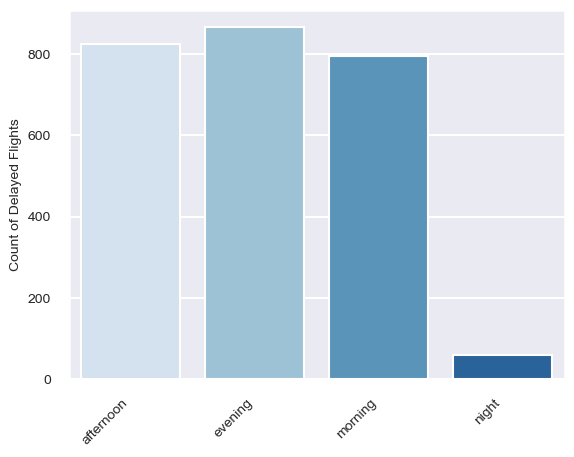

In [381]:
# Plotting the results of the time of the day

# Creating a bar plot of the count of delayed flights by time of day
sns.barplot(x=train_flights_subset_grouped_by_time_counts.index, y=train_flights_subset_grouped_by_time_counts.values, palette='Blues')

# Setting the x-axis label and tick labels
plt.xlabel(None)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Setting the y-axis label and tick labels
plt.ylabel('Count of Delayed Flights', fontsize=10)
plt.yticks(fontsize=10)
# plt.yticklabels(train_flights_subset_grouped_by_time_counts.values, fontsize=10)

# Showing the plot
plt.show()

From the analysis of the time of the day, we can notice that during the afternoon and evening the airports deal with the highest amount of flight delays.

In [382]:
# Grouping by day of month

train_flights_subset_grouped_by_day_counts = train_flights_subset.groupby('day_of_month')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_day_counts.head(31)

day_of_month
1      79
2      83
3      85
4      63
5      82
6      84
7      84
8      85
9     102
10     85
11     89
12     98
13     91
14     78
15     93
16     90
17     73
18     83
19     87
20     93
21    113
22     89
23     75
24     82
25     64
26     81
27     74
28     65
29     72
30     69
31     52
Name: arr_delay, dtype: int64

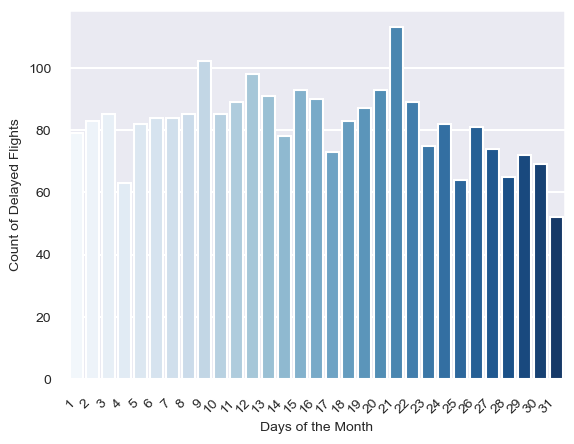

In [383]:
# Plotting the results of the day of the month

sns.barplot(x=train_flights_subset_grouped_by_day_counts.index, y=train_flights_subset_grouped_by_day_counts.values, palette='Blues')

plt.xlabel('Days of the Month', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.ylabel('Count of Delayed Flights', fontsize=10)
plt.yticks(fontsize=10)

plt.show()

From the results described below and graph, we can see that the top 5 days of the month with the highest amount of flights delays are in descending order: 21, 9, 12, 15, 20 and 13.

In [384]:
# Groupping by day of the week

train_flights_subset_grouped_by_week_counts = train_flights_subset.groupby('day_of_week')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_week_counts.head(7)

day_of_week
0    408
1    363
2    340
3    384
4    399
5    279
6    370
Name: arr_delay, dtype: int64

From the results below and graph, we can notice that the week days with the highest count of flight delays are (in descending order): Monday, Friday and Sunday.

In [385]:
# Grouping by month

train_flights_subset_grouped_by_month_counts = train_flights_subset.groupby('month')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_month_counts.head(12)

month
1     203
2     211
3     204
4     203
5     219
6     257
7     253
8     228
9     165
10    222
11    199
12    179
Name: arr_delay, dtype: int64

/var/folders/zt/gl7xtkgj7238nsqq03s_q7840000gn/T/ipykernel_2344/963365703.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize=9)


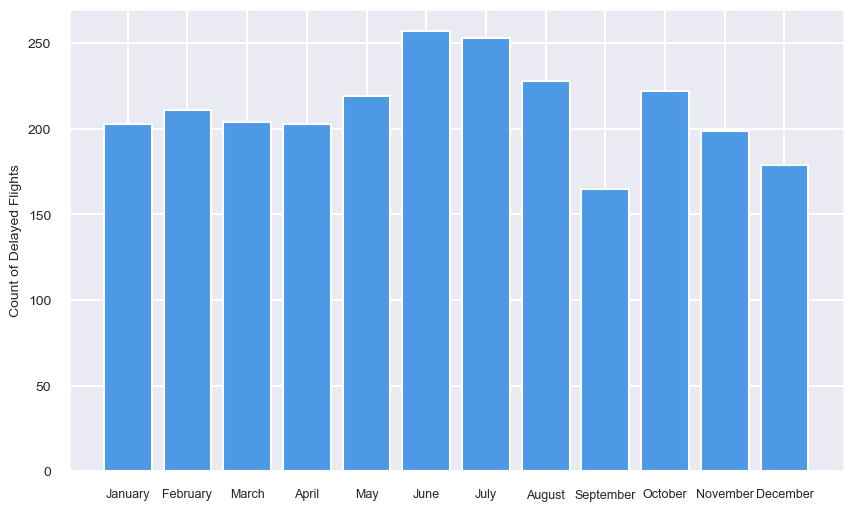

In [386]:
# Plotting the results

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.bar(train_flights_subset_grouped_by_month_counts.index, train_flights_subset_grouped_by_month_counts.values, color=(0.3, 0.6, 0.9))

ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize=9)
# ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Count of Delayed Flights', fontsize=10)

plt.xticks(train_flights_subset_grouped_by_month_counts.index)
plt.yticks(fontsize=10)

plt.show()

From these results, it is noted that June, July, August and October have the highest count of flight delays. In addition, June and July corresponde to summer season and to many family vacations, therefore these factors combined with others might explain the higher count of delays in those 2 first months.

In [387]:
# Grouping by quarter

train_flights_subset_grouped_by_quarter_counts = train_flights_subset.groupby('quarter')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_quarter_counts.head(4)

quarter
Q1    618
Q2    679
Q3    646
Q4    600
Name: arr_delay, dtype: int64

In [388]:
# Grouping by semester

train_flights_subset_grouped_by_quarter_counts = train_flights_subset.groupby('semester')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_quarter_counts.head()

semester
S1    618
S2    679
S3    646
S4    600
Name: arr_delay, dtype: int64

The results show a similar count of flight delays by quarter, however the Q2 and Q3 represent a little higher amount of flight delays. This information matches with the months that represent a higher count of flight delays presented before (e.g. June, July and August).

In [389]:
# Grouping by year

train_flights_subset_grouped_by_year_counts = train_flights_subset.groupby('year')['arr_delay'].apply(lambda x: (x > 0).sum())
train_flights_subset_grouped_by_year_counts.head()

year
2018    1229
2019    1314
Name: arr_delay, dtype: int64

Both 2 years represent a similar count of flight delays being the year of 2019 with a higher amount.
Obs.: As we are working with a random trainning sample, the results correspond to the years presented on it, in this case, 2018 and 2019.

In [390]:
# Converting some object data types into a category data type

train_flights_subset['mkt_unique_carrier'] = train_flights_subset['mkt_unique_carrier'].astype('category')
train_flights_subset['mkt_carrier'] = train_flights_subset['mkt_carrier'].astype('category')
train_flights_subset['op_unique_carrier'] = train_flights_subset['op_unique_carrier'].astype('category')
train_flights_subset['tail_num'] = train_flights_subset['tail_num'].astype('category')
train_flights_subset['origin'] = train_flights_subset['origin'].astype('category')
train_flights_subset['dest'] = train_flights_subset['dest'].astype('category')
train_flights_subset.tail()

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,year,month,day_of_month,day_of_week,quarter,semester,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day
6995,AA,AA,850,AA,N197UW,850,13303,MIA,"Miami, FL",14100,...,2018,3,26,0,Q1,S1,9,morning,11,morning
6996,AA,AA,2665,AA,N196AA,2665,14100,PHL,"Philadelphia, PA",13303,...,2019,2,5,1,Q1,S1,10,morning,13,afternoon
6997,AA,AA,5180,OH,N725PS,5180,11057,CLT,"Charlotte, NC",12197,...,2018,12,26,2,Q4,S4,11,morning,13,afternoon
6998,AA,AA,576,AA,N188US,576,14893,SMF,"Sacramento, CA",11057,...,2018,11,10,5,Q4,S4,22,evening,6,morning
6999,DL,DL,4669,OO,N772SK,4669,13487,MSP,"Minneapolis, MN",11193,...,2018,5,3,3,Q2,S2,8,morning,11,morning


In [391]:
# Checking the data types

train_flights_subset.dtypes

mkt_unique_carrier     category
mkt_carrier            category
mkt_carrier_fl_num        int64
op_unique_carrier      category
tail_num               category
op_carrier_fl_num         int64
origin_airport_id         int64
origin                 category
origin_city_name         object
dest_airport_id           int64
dest                   category
dest_city_name           object
arr_delay               float64
diverted                  int64
dup                      object
crs_elapsed_time          int64
actual_elapsed_time     float64
air_time                float64
flights                   int64
distance                  int64
carrier_delay           float64
weather_delay           float64
nas_delay               float64
security_delay          float64
late_aircraft_delay     float64
year                      int64
month                     int64
day_of_month              int64
day_of_week               int64
quarter                  object
semester                 object
dep_hour

When we were checking the object data types, we noticed that the variables 'origin_city_name' and 'dest_city_name' have the name of the city and state separated by a comma being classified as an object. The strucutre of this information is not going to help us. So, let's separate this information in 2 more columns below.

In [392]:
# Separating the name of the city and state from 'origin_city_name' and 'dest_city_name'

train_flights_subset['origin_state'] = train_flights_subset['origin_city_name'].apply(lambda x: x.split(', ')[1])
train_flights_subset['destination_state'] = train_flights_subset['dest_city_name'].apply(lambda x: x.split(', ')[1])
print(train_flights_subset['origin_state'])
print(train_flights_subset['destination_state'])

0       NY
1       CA
2       WV
3       MD
4       IN
        ..
6995    FL
6996    PA
6997    NC
6998    CA
6999    MN
Name: origin_state, Length: 6975, dtype: object
0       PA
1       NY
2       DC
3       OH
4       CO
        ..
6995    PA
6996    FL
6997    NY
6998    NC
6999    OH
Name: destination_state, Length: 6975, dtype: object


In [393]:
# As we will not have the 'dep_delay' information in the real-life, we are going to use the statistics to measure it with other delays based on the specific time of the year
# For that, we are using the carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay to understand their pattern (not to use them directly in the predictions)

# Analyzing first the mean of each delay type using NumPy

carrier_delay_mean = np.mean(train_flights_subset['carrier_delay'])
weather_delay_mean = np.mean(train_flights_subset['weather_delay'])
nas_delay_mean = np.mean(train_flights_subset['nas_delay'])
security_delay_mean = np.mean(train_flights_subset['security_delay'])
late_aircraft_delay_mean = np.mean(train_flights_subset['late_aircraft_delay'])

# Printing the results

print('Mean carrier delay is', carrier_delay_mean)
print('Mean weather delay is', weather_delay_mean)
print('Mean NAS delay is', nas_delay_mean)
print('Mean security delay is', security_delay_mean)
print('Mean late aircraft delay is', late_aircraft_delay_mean)

Mean carrier delay is 19.782575173477902
Mean weather delay is 2.678488820354682
Mean NAS delay is 17.033153430995117
Mean security delay is 0.08712413261373267
Mean late aircraft delay is 26.69082498072792


In [394]:
# Calculating the statistics for all delay types

delay_stats = train_flights_subset[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].describe()
delay_stats

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000
mean,19.782575,2.678489,17.033153,0.087124,26.690825
std,25.848438,8.952115,22.161171,0.959247,26.372497
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.782575,2.678489,17.033153,0.087124,26.690825
50%,19.782575,2.678489,17.033153,0.087124,26.690825
75%,19.782575,2.678489,17.033153,0.087124,26.690825
max,1174.000000,556.000000,1272.000000,71.000000,1094.000000


In [395]:
# Now the statistics in regards of our target variable (arr_delay)

delay_stats = train_flights_subset.groupby('arr_delay')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].describe()
delay_stats

carrier_delay                                              \
                  count         mean  std          min          25%   
arr_delay                                                             
-62.0               1.0    19.782575  NaN    19.782575    19.782575   
-54.0               1.0    19.782575  NaN    19.782575    19.782575   
-50.0               3.0    19.782575  0.0    19.782575    19.782575   
-49.0               2.0    19.782575  0.0    19.782575    19.782575   
-47.0               2.0    19.782575  0.0    19.782575    19.782575   
...                 ...          ...  ...          ...          ...   
 836.0              1.0     0.000000  NaN     0.000000     0.000000   
 955.0              1.0   878.000000  NaN   878.000000   878.000000   
 1111.0             1.0    17.000000  NaN    17.000000    17.000000   
 1174.0             1.0  1174.000000  NaN  1174.000000  1174.000000   
 1272.0             1.0     0.000000  NaN     0.000000     0.000000   

                                                 weather_delay            ...  \
                   50%          75%          max         count      mean  ...   
arr_delay                                                                 ...   
-62.0        19.782575    19.782575    19.782575           1.0  2.678489  ...   
-54.0        19.782575    19.782575    19.782575           1.0  2.678489  ...   
-50.0        19.782575    19.782575    19.782575           3.0  2.678489  ...   
-49.0        19.782575    19.782575    19.782575           2.0  2.678489  ...   
-47.0        19.782575    19.782575    19.782575           2.0  2.678489  ...   
...                ...          ...          ...           ...       ...  ...   
 836.0        0.000000     0.000000     0.000000           1.0  0.000000  ...   
 955.0      878.000000   878.000000   878.000000           1.0  0.000000  ...   
 1111.0      17.000000    17.000000    17.000000           1.0  0.000000  ...   
 1174.0    1174.000000  1174.000000  1174.000000           1.0  0.000000  ...   
 1272.0       0.000000     0.000000     0.000000           1.0  0.000000  ...   

          security_delay           late_aircraft_delay               \
                     75%       max               count         mean   
arr_delay                                                             
-62.0           0.087124  0.087124                 1.0    26.690825   
-54.0           0.087124  0.087124                 1.0    26.690825   
-50.0           0.087124  0.087124                 3.0    26.690825   
-49.0           0.087124  0.087124                 2.0    26.690825   
-47.0           0.087124  0.087124                 2.0    26.690825   
...                  ...       ...                 ...          ...   
 836.0          0.000000  0.000000                 1.0     0.000000   
 955.0          0.000000  0.000000                 1.0    68.000000   
 1111.0         0.000000  0.000000                 1.0  1094.000000   
 1174.0         0.000000  0.000000                 1.0     0.000000   
 1272.0         0.000000  0.000000                 1.0     0.000000   

                                                                             \
                    std          min          25%          50%          75%   
arr_delay                                                                     
-62.0               NaN    26.690825    26.690825    26.690825    26.690825   
-54.0               NaN    26.690825    26.690825    26.690825    26.690825   
-50.0      4.351168e-15    26.690825    26.690825    26.690825    26.690825   
-49.0      0.000000e+00    26.690825    26.690825    26.690825    26.690825   
-47.0      0.000000e+00    26.690825    26.690825    26.690825    26.690825   
...                 ...          ...          ...          ...          ...   
 836.0              NaN     0.000000     0.000000     0.000000     0.000000   
 955.0              NaN    68.000000    68.000000    68.000000    68.000000   
 1111.0         

From this statistics, it is noted that the max count of delays are caused by the variables 'nas_delay', 'carrier_delay' and 'late_aircraft_delay'. Also, these same variables are among the ones with the highest mean of the delays, so this might indicate that most of the factors that cause flight delays are related to airplanes traffic, maintanance and service.

From that, let's try to calculate the mean of the arrival delays considering the 'mkt_unique_carrier' variable to check the count of delays per airline.

In [396]:
# Calculating the mean of the 'arr_delay' per 'mkt_unique_carrier' and 'op_unique_carrier'

# To analyze flight delays by the airline that sold the ticket, we are using the 'mkt_unique_carrier' lines that marketed and sold the tickets

train_flights_subset['arr_delay_mean_by_mkt_unique_carrier']=train_flights_subset.groupby(['mkt_unique_carrier'])['arr_delay'].transform(np.mean)

# To analyze delays by the airline that physically operated the flight, we are using the 'op_unique_carrier' 

train_flights_subset['arr_delay_mean_by_op_unique_carrier']=train_flights_subset.groupby(['op_unique_carrier'])['arr_delay'].transform(np.mean)
train_flights_subset.head(5)

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,quarter,semester,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day,origin_state,destination_state,arr_delay_mean_by_mkt_unique_carrier,arr_delay_mean_by_op_unique_carrier
0,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",14100,...,Q4,S4,13,afternoon,14,afternoon,NY,PA,5.328596,5.953181
1,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",12478,...,Q4,S4,23,evening,8,morning,CA,NY,6.360829,6.360829
2,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",12264,...,Q3,S3,6,morning,7,morning,WV,DC,10.231880,7.331876
3,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",11193,...,Q1,S1,8,morning,10,morning,MD,OH,2.438350,2.438350
4,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",11292,...,Q2,S2,6,morning,7,morning,IN,CO,2.438350,2.438350


In [397]:
# Sorting by arr_delay_mean_by_mkt_unique_carrier

train_flights_subset_sorted = train_flights_subset.sort_values('arr_delay_mean_by_mkt_unique_carrier', ascending=False)
print(train_flights_subset_sorted[['mkt_unique_carrier', 'arr_delay_mean_by_mkt_unique_carrier']].head(10))

     mkt_unique_carrier  arr_delay_mean_by_mkt_unique_carrier
4028                 UA                              10.23188
5623                 UA                              10.23188
1294                 UA                              10.23188
5614                 UA                              10.23188
1291                 UA                              10.23188
1290                 UA                              10.23188
6178                 UA                              10.23188
5945                 UA                              10.23188
4120                 UA                              10.23188
4121                 UA                              10.23188


In [398]:
# Sorting by arr_delay_mean_by_op_unique_carrier

train_flights_subset.sort_values('arr_delay_mean_by_op_unique_carrier', ascending=False)
print(train_flights_subset[['op_unique_carrier', 'arr_delay_mean_by_op_unique_carrier']].head(10))

  op_unique_carrier  arr_delay_mean_by_op_unique_carrier
0                PT                             5.953181
1                B6                             6.360829
2                OO                             7.331876
3                WN                             2.438350
4                WN                             2.438350
5                MQ                             5.849723
6                DL                            -0.301824
7                WN                             2.438350
8                AA                             5.396410
9                AA                             5.396410


It is noted that from the 'mkt_unique_carrier' (marketing unique carrier) variable, which refers to the airline that sold the ticket for the flight, the United Airlines (UA) has the highest mean of arrival delay in the results. 

In regards to the 'op_unique_carrier', the SkyWest Airlines (OO), which is a regional airline that operates flights on behalf of other airlines, JetBlue Airways (B6), which is a low-cost airline based in the United States, and Piedmont Airlines (PT), which is a regional airline that operates flights on behalf of American Airlines, are among with the higher arrival delay in the group of the airlines that physically operate the flights.

Therefore, the results indicate that *United Airlines* has the highest mean arrival delay among all airlines, while *SkyWest Airlines*, *JetBlue Airways*, and *Piedmont Airlines* have high mean arrival delays when they are the airlines physically operating the flight.

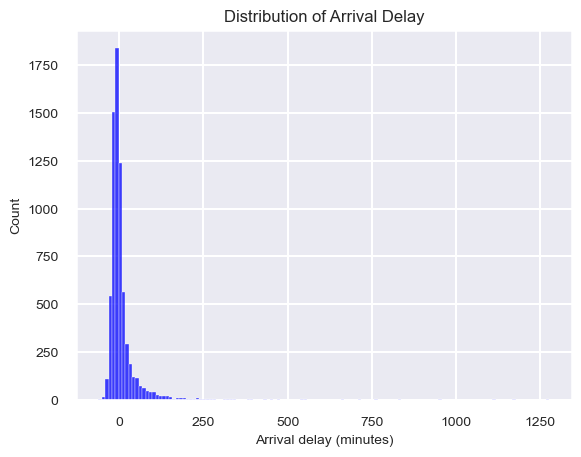

In [399]:
# Plotting the distribution of the 'arr_delay' to visualize it before encoding it

sns.histplot(data=train_flights_subset, x='arr_delay', bins=50, color='blue', binwidth=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Arrival delay (minutes)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Arrival Delay', fontsize=12)
plt.show()

In [400]:
# Use the encoding technique transform the 'arr_delay' variable in a binary one with a new colum

arr_delay_encoded = []
for delay in train_flights_subset['arr_delay']:
    if delay > 0:
        arr_delay_encoded.append(1)
    else:
        arr_delay_encoded.append(0)

train_flights_subset['arr_delay_encoded'] = arr_delay_encoded
train_flights_subset.head()

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,semester,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day,origin_state,destination_state,arr_delay_mean_by_mkt_unique_carrier,arr_delay_mean_by_op_unique_carrier,arr_delay_encoded
0,AA,AA,4850,PT,N657AE,4850,15096,SYR,"Syracuse, NY",14100,...,S4,13,afternoon,14,afternoon,NY,PA,5.328596,5.953181,0
1,B6,B6,168,B6,N633JB,168,13796,OAK,"Oakland, CA",12478,...,S4,23,evening,8,morning,CA,NY,6.360829,6.360829,1
2,UA,UA,5068,OO,N975SW,5068,11027,CKB,"Clarksburg/Fairmont, WV",12264,...,S3,6,morning,7,morning,WV,DC,10.231880,7.331876,0
3,WN,WN,388,WN,N968WN,388,10821,BWI,"Baltimore, MD",11193,...,S1,8,morning,10,morning,MD,OH,2.438350,2.438350,1
4,WN,WN,1353,WN,N8575Z,1353,12339,IND,"Indianapolis, IN",11292,...,S2,6,morning,7,morning,IN,CO,2.438350,2.438350,1


In [401]:
# Applying label encoding to our categorical variables
# We are going to use label encoding even though we know that this is better used for variables with some order
# We haven't used one-hot encoding for that because this would increase the size of the dataset as we have lots of variables to convert

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_flights_subset['mkt_unique_carrier'] = label_encoder.fit_transform(train_flights_subset[['mkt_unique_carrier']])
train_flights_subset['mkt_carrier'] = label_encoder.fit_transform(train_flights_subset[['mkt_carrier']])
train_flights_subset['mkt_carrier_fl_num'] = label_encoder.fit_transform(train_flights_subset[['mkt_carrier_fl_num']])
train_flights_subset['op_unique_carrier'] = label_encoder.fit_transform(train_flights_subset[['op_unique_carrier']])
train_flights_subset['op_carrier_fl_num'] = label_encoder.fit_transform(train_flights_subset[['op_carrier_fl_num']])
train_flights_subset['tail_num'] = label_encoder.fit_transform(train_flights_subset[['tail_num']])
train_flights_subset.tail(10)

/opt/anaconda3/envs/base_env/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,semester,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day,origin_state,destination_state,arr_delay_mean_by_mkt_unique_carrier,arr_delay_mean_by_op_unique_carrier,arr_delay_encoded
6990,3,3,1852,7,3875,1852,10397,ATL,"Atlanta, GA",14027,...,S2,15,afternoon,17,evening,GA,FL,2.144038,-0.301824,0
6991,0,0,2419,15,691,2419,10781,BTR,"Baton Rouge, LA",11298,...,S4,12,afternoon,14,afternoon,LA,TX,5.328596,5.849723,0
6992,1,1,388,2,1675,388,14908,SNA,"Santa Ana, CA",14747,...,S1,15,afternoon,18,evening,CA,WA,1.305767,1.322588,1
6993,10,10,388,23,2264,388,14570,RNO,"Reno, NV",14831,...,S1,18,evening,19,evening,NV,CA,2.438350,2.438350,0
6994,10,10,374,23,2976,374,14679,SAN,"San Diego, CA",10821,...,S1,6,morning,14,afternoon,CA,MD,2.438350,2.438350,0
6995,0,0,660,1,443,660,13303,MIA,"Miami, FL",14100,...,S1,9,morning,11,morning,FL,PA,5.328596,5.396410,0
6996,0,0,1984,1,438,1984,14100,PHL,"Philadelphia, PA",13303,...,S1,10,morning,13,afternoon,PA,FL,5.328596,5.396410,0
6997,0,0,3337,17,2350,3337,11057,CLT,"Charlotte, NC",12197,...,S4,11,morning,13,afternoon,NC,NY,5.328596,6.229542,0
6998,0,0,445,1,414,445,14893,SMF,"Sacramento, CA",11057,...,S4,22,evening,6,morning,CA,NC,5.328596,5.396410,0
6999,3,3,3050,18,2532,3050,13487,MSP,"Minneapolis, MN",11193,...,S2,8,morning,11,morning,MN,OH,2.144038,7.331876,0


In [402]:
# Creating a function to calculate the arrival delay with the variables 'origin_airport_id' and 'dest_airport_id'

def total_delay_by_airport_pair(df, origin_airport_id, dest_airport_id):
    """
    This function calculates the total arrival delay for a specific pair of origin and destination airports variables.
    These are the arguments or inputs of the function:
        df: a dataframe with specific columns "origin_airport_id", "dest_airport_id", and "arr_delay";
        origin_airport_id: an integer representing the ID of the origin airport
        dest_airport_id: an integer representing the ID of the destination airport
    The output of this function is:
        The total arrival delay for the given airport pair of ids
    """
    total_delay = 0
    total_delay = df.loc[(df['origin_airport_id'] == origin_airport_id) & (df['dest_airport_id'] == dest_airport_id), 'arr_delay'].sum()
    return total_delay

In [403]:
# Testing the function

total_delay = total_delay_by_airport_pair(train_flights_subset, 10397, 14027)
print(total_delay)

8.0


In [404]:
# Calculating the total airport traffic with the variables 'origin_airport_id' and 'dest_airport_id'

total_delay = total_delay_by_airport_pair(train_flights_subset, 11193, 13930)
print(f'The total delay of the airport 11193 to the airport 13930 is {total_delay}.')
total_delay = total_delay_by_airport_pair(train_flights_subset, 11618, 13487)
print(f'The total delay of the airport 11618 to the airport 13487 is {total_delay}.')
total_delay = total_delay_by_airport_pair(train_flights_subset, 11540, 12892)
print(f'The total delay of the airport 11540 to the airport 12892 is {total_delay}.')

The total delay of the airport 11193 to the airport 13930 is 1231.0.
The total delay of the airport 11618 to the airport 13487 is 1174.0.
The total delay of the airport 11540 to the airport 12892 is 1111.0.


In [405]:
# Filtering the df to check the name of the airports id

filtered_train_flights_subset = train_flights_subset[(train_flights_subset['origin_airport_id'] == 11193) & (train_flights_subset['dest_airport_id'] == 13930)]
print(filtered_train_flights_subset.head(1))

     mkt_unique_carrier  mkt_carrier  mkt_carrier_fl_num  op_unique_carrier  \
254                   0            0                2324                 15   

     tail_num  op_carrier_fl_num  origin_airport_id origin origin_city_name  \
254      3434               2324              11193    CVG   Cincinnati, OH   

     dest_airport_id  ... semester dep_hour_of_day  dep_time_of_day  \
254            13930  ...       S1               9          morning   

     arr_hour_of_day arr_time_of_day  origin_state  destination_state  \
254               10         morning            OH                 IL   

     arr_delay_mean_by_mkt_unique_carrier  \
254                              5.328596   

     arr_delay_mean_by_op_unique_carrier  arr_delay_encoded  
254                             5.849723                  0  

[1 rows x 40 columns]


In [406]:
# Filtering the df to check the name of the airports id

filtered_train_flights_subset = train_flights_subset[(train_flights_subset['origin_airport_id'] == 11618) & (train_flights_subset['dest_airport_id'] == 13487)]
print(filtered_train_flights_subset.head(1))

      mkt_unique_carrier  mkt_carrier  mkt_carrier_fl_num  op_unique_carrier  \
5468                   3            3                2611                 18   

      tail_num  op_carrier_fl_num  origin_airport_id origin origin_city_name  \
5468      2749               2611              11618    EWR       Newark, NJ   

      dest_airport_id  ... semester dep_hour_of_day  dep_time_of_day  \
5468            13487  ...       S1              19          evening   

      arr_hour_of_day arr_time_of_day  origin_state  destination_state  \
5468               21         evening            NJ                 MN   

      arr_delay_mean_by_mkt_unique_carrier  \
5468                              2.144038   

      arr_delay_mean_by_op_unique_carrier  arr_delay_encoded  
5468                             7.331876                  1  

[1 rows x 40 columns]


In [407]:
# Filtering the df to check the name of the airports id

filtered_train_flights_subset = train_flights_subset[(train_flights_subset['origin_airport_id'] == 11540) & (train_flights_subset['dest_airport_id'] == 12892)]
print(filtered_train_flights_subset.head(1))

      mkt_unique_carrier  mkt_carrier  mkt_carrier_fl_num  op_unique_carrier  \
1727                   0            0                3871                  6   

      tail_num  op_carrier_fl_num  origin_airport_id origin origin_city_name  \
1727       499               3871              11540    ELP      El Paso, TX   

      dest_airport_id  ... semester dep_hour_of_day  dep_time_of_day  \
1727            12892  ...       S2               6          morning   

      arr_hour_of_day arr_time_of_day  origin_state  destination_state  \
1727                7         morning            TX                 CA   

      arr_delay_mean_by_mkt_unique_carrier  \
1727                              5.328596   

      arr_delay_mean_by_op_unique_carrier  arr_delay_encoded  
1727                            17.384559                  1  

[1 rows x 40 columns]


From those results, the airport trajectories with origin in (1) Cincinnati to Illinois, (2) Newark to MN and (3) El Paso, TX to California are the ones with the higher counts of total delays.

In [408]:
# Creating a function to calculate the airport traffic with the variables 'origin' and 'dest'

def count_airport_traffic(df):
    """
    This function counts the number of flights for each origin-destination airport pair.
    The inputs or arguments are:
        df: a data frame containing the columns "origin_airport_id" and "dest_airport_id"
    The outputs of this function are:
        A new pandas df with two columns: "origin_dest_pair" (a string representing the origin-destination airport pair)
        and "flight_count" (an integer representing the number of flights for that airport pair)
    """
    df['origin_dest_pair'] = df['origin'] + '-' + df['dest']
    airport_traffic = df.groupby('origin_dest_pair').size().reset_index(name='flight_count')
    return airport_traffic

In [409]:
# Converting the "origin" and "dest" columns to strings before testing the function

train_flights_subset["origin"] = train_flights_subset["origin"].astype(str)
train_flights_subset["dest"] = train_flights_subset["dest"].astype(str)
train_flights_subset.dtypes

mkt_unique_carrier                        int64
mkt_carrier                               int64
mkt_carrier_fl_num                        int64
op_unique_carrier                         int64
tail_num                                  int64
op_carrier_fl_num                         int64
origin_airport_id                         int64
origin                                   object
origin_city_name                         object
dest_airport_id                           int64
dest                                     object
dest_city_name                           object
arr_delay                               float64
diverted                                  int64
dup                                      object
crs_elapsed_time                          int64
actual_elapsed_time                     float64
air_time                                float64
flights                                   int64
distance                                  int64
carrier_delay                           

In [410]:
# Testing the function

train_flights_subset['origin_dest_pair'] = train_flights_subset['origin'] + '-' + train_flights_subset['dest']
airport_traffic = train_flights_subset.groupby('origin_dest_pair').size().reset_index(name='flight_count')
print(airport_traffic)

     origin_dest_pair  flight_count
0             ABE-ORD             1
1             ABE-PGD             2
2             ABE-SFB             2
3             ABI-DFW             1
4             ABQ-ATL             1
...               ...           ...
3150          VPS-SHV             1
3151          XNA-ATL             4
3152          XNA-DEN             1
3153          XNA-ORD             1
3154          YAK-CDV             1

[3155 rows x 2 columns]


In [411]:
# Analysing some results

train_flights_subset.groupby('origin_dest_pair').tail()

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,dep_hour_of_day,dep_time_of_day,arr_hour_of_day,arr_time_of_day,origin_state,destination_state,arr_delay_mean_by_mkt_unique_carrier,arr_delay_mean_by_op_unique_carrier,arr_delay_encoded,origin_dest_pair
0,0,0,3153,19,2100,3153,15096,SYR,"Syracuse, NY",14100,...,13,afternoon,14,afternoon,NY,PA,5.328596,5.953181,0,SYR-PHL
1,2,2,114,4,1997,114,13796,OAK,"Oakland, CA",12478,...,23,evening,8,morning,CA,NY,6.360829,6.360829,1,OAK-JFK
2,8,8,3276,18,3831,3276,11027,CKB,"Clarksburg/Fairmont, WV",12264,...,6,morning,7,morning,WV,DC,10.231880,7.331876,0,CKB-IAD
3,10,10,283,23,3806,283,10821,BWI,"Baltimore, MD",11193,...,8,morning,10,morning,MD,OH,2.438350,2.438350,1,BWI-CVG
4,10,10,1021,23,3001,1021,12339,IND,"Indianapolis, IN",11292,...,6,morning,7,morning,IN,CO,2.438350,2.438350,1,IND-DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,660,1,443,660,13303,MIA,"Miami, FL",14100,...,9,morning,11,morning,FL,PA,5.328596,5.396410,0,MIA-PHL
6996,0,0,1984,1,438,1984,14100,PHL,"Philadelphia, PA",13303,...,10,morning,13,afternoon,PA,FL,5.328596,5.396410,0,PHL-MIA
6997,0,0,3337,17,2350,3337,11057,CLT,"Charlotte, NC",12197,...,11,morning,13,afternoon,NC,NY,5.328596,6.229542,0,CLT-HPN
6998,0,0,445,1,414,445,14893,SMF,"Sacramento, CA",11057,...,22,evening,6,morning,CA,NC,5.328596,5.396410,0,SMF-CLT


From this result, it is noted that the origin_dest_pair of the airports OAK-JFK have the same mean of 'arrival_delay' by 'mk_unique_carrier' and 'op_unique_carrier' (both airlines that sell the ticket and operate the flight). In addition to that, the pair CKB-IAD have a high mean of arrival delay caused by the carrier that sells the ticket ('mkt_unique_carrier').

In [412]:
# Checking the labeling encoding order

label_encoder = LabelEncoder()
label_encoder.fit(train_flights_subset['mkt_unique_carrier'])

# Getting the unique classes and their order

classes = label_encoder.classes_
print(classes)

# Example to convert back the label enconding to the original variable

# label_encoder = LabelEncoder()

# train_flights_subset['mkt_unique_carrier'] = label_encoder.fit_transform(train_flights_subset['mkt_unique_carrier'])
# train_flights_subset['op_unique_carrier'] = label_encoder.fit_transform(train_flights_subset['op_unique_carrier'])

[ 0  1  2  3  4  5  6  7  8  9 10]


In [413]:
# Checking some columns that are still object to be converted into numerical ones

train_flights_subset.dtypes

mkt_unique_carrier                        int64
mkt_carrier                               int64
mkt_carrier_fl_num                        int64
op_unique_carrier                         int64
tail_num                                  int64
op_carrier_fl_num                         int64
origin_airport_id                         int64
origin                                   object
origin_city_name                         object
dest_airport_id                           int64
dest                                     object
dest_city_name                           object
arr_delay                               float64
diverted                                  int64
dup                                      object
crs_elapsed_time                          int64
actual_elapsed_time                     float64
air_time                                float64
flights                                   int64
distance                                  int64
carrier_delay                           

In [414]:
# Converting some categorical features with the .getdummies function 
# Columns to be changed: 'quarter', 'semester', 'dep_time_of_day' and 'arr_time_of_day'

train_flights_subset = pd.get_dummies(train_flights_subset, columns=['quarter', 'dep_time_of_day', 'arr_time_of_day'])
train_flights_subset.head()

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,quarter_Q3,quarter_Q4,dep_time_of_day_afternoon,dep_time_of_day_evening,dep_time_of_day_morning,dep_time_of_day_night,arr_time_of_day_afternoon,arr_time_of_day_evening,arr_time_of_day_morning,arr_time_of_day_night
0,0,0,3153,19,2100,3153,15096,SYR,"Syracuse, NY",14100,...,0,1,1,0,0,0,1,0,0,0
1,2,2,114,4,1997,114,13796,OAK,"Oakland, CA",12478,...,0,1,0,1,0,0,0,0,1,0
2,8,8,3276,18,3831,3276,11027,CKB,"Clarksburg/Fairmont, WV",12264,...,1,0,0,0,1,0,0,0,1,0
3,10,10,283,23,3806,283,10821,BWI,"Baltimore, MD",11193,...,0,0,0,0,1,0,0,0,1,0
4,10,10,1021,23,3001,1021,12339,IND,"Indianapolis, IN",11292,...,0,0,0,0,1,0,0,0,1,0


In [415]:
# Converting 'origin_state' and 'destination_state' to categories

train_flights_subset['origin_state'] = train_flights_subset['origin_state'].astype('category')
train_flights_subset['destination_state'] = train_flights_subset['destination_state'].astype('category')

In [416]:
# Checking again the columns list and missing values

train_flights_subset.isnull().sum()

mkt_unique_carrier                      0
mkt_carrier                             0
mkt_carrier_fl_num                      0
op_unique_carrier                       0
tail_num                                0
op_carrier_fl_num                       0
origin_airport_id                       0
origin                                  0
origin_city_name                        0
dest_airport_id                         0
dest                                    0
dest_city_name                          0
arr_delay                               0
diverted                                0
dup                                     0
crs_elapsed_time                        0
actual_elapsed_time                     0
air_time                                0
flights                                 0
distance                                0
carrier_delay                           0
weather_delay                           0
nas_delay                               0
security_delay                    

In [417]:
# Dropping columns of the df that is going to be converted in the .csv file to be used in the model

train_flights_subset = train_flights_subset.drop(['dup', 'diverted', 'semester', 'origin_city_name', 'dest_city_name', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis = 1)
train_flights_subset

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,...,quarter_Q3,quarter_Q4,dep_time_of_day_afternoon,dep_time_of_day_evening,dep_time_of_day_morning,dep_time_of_day_night,arr_time_of_day_afternoon,arr_time_of_day_evening,arr_time_of_day_morning,arr_time_of_day_night
0,0,0,3153,19,2100,3153,15096,SYR,14100,PHL,...,0,1,1,0,0,0,1,0,0,0
1,2,2,114,4,1997,114,13796,OAK,12478,JFK,...,0,1,0,1,0,0,0,0,1,0
2,8,8,3276,18,3831,3276,11027,CKB,12264,IAD,...,1,0,0,0,1,0,0,0,1,0
3,10,10,283,23,3806,283,10821,BWI,11193,CVG,...,0,0,0,0,1,0,0,0,1,0
4,10,10,1021,23,3001,1021,12339,IND,11292,DEN,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,660,1,443,660,13303,MIA,14100,PHL,...,0,0,0,0,1,0,0,0,1,0
6996,0,0,1984,1,438,1984,14100,PHL,13303,MIA,...,0,0,0,0,1,0,1,0,0,0
6997,0,0,3337,17,2350,3337,11057,CLT,12197,HPN,...,0,1,0,0,1,0,1,0,0,0
6998,0,0,445,1,414,445,14893,SMF,11057,CLT,...,0,1,0,1,0,0,0,0,1,0


In [418]:
# Converting the df to a .csv file

train_flights_subset.to_csv('train_flights_subset_cleaned_version_4.csv', index = False)

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA components?

After the EAD and feature engineering analysis, we noticed that it is not an easy task to know which features should be selected to try out in our first model as we are going to lose the impact of other variables and factors to be considered in the analysis. So this feature selection is one of our first tries.

In [419]:
# Importing Libraries

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [420]:
# Loading the cleaned and processed df

train_flights_subset_cleaned_version_0 = pd.read_csv('train_flights_subset_cleaned_version_4.csv', sep = ',')
train_flights_subset_cleaned_version_0.head() 

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,...,quarter_Q3,quarter_Q4,dep_time_of_day_afternoon,dep_time_of_day_evening,dep_time_of_day_morning,dep_time_of_day_night,arr_time_of_day_afternoon,arr_time_of_day_evening,arr_time_of_day_morning,arr_time_of_day_night
0,0,0,3153,19,2100,3153,15096,SYR,14100,PHL,...,0,1,1,0,0,0,1,0,0,0
1,2,2,114,4,1997,114,13796,OAK,12478,JFK,...,0,1,0,1,0,0,0,0,1,0
2,8,8,3276,18,3831,3276,11027,CKB,12264,IAD,...,1,0,0,0,1,0,0,0,1,0
3,10,10,283,23,3806,283,10821,BWI,11193,CVG,...,0,0,0,0,1,0,0,0,1,0
4,10,10,1021,23,3001,1021,12339,IND,11292,DEN,...,0,0,0,0,1,0,0,0,1,0


In [421]:
# Selecting the features to be included in the analysis
# Adding 'arr_delay' on the y-axis

X = train_flights_subset_cleaned_version_0.drop('arr_delay', axis=1).select_dtypes(include=[np.number])
y = train_flights_subset_cleaned_version_0['arr_delay']

In [422]:
# Normalizing the data to have less variance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.1783183 , -1.1783183 ,  1.1119689 , ..., -0.81114181,
        -0.62538381, -0.15322409],
       [-0.64874131, -0.64874131, -1.49699601, ..., -0.81114181,
         1.59901806, -0.15322409],
       [ 0.93998968,  0.93998968,  1.21756373, ..., -0.81114181,
         1.59901806, -0.15322409],
       ...,
       [-1.1783183 , -1.1783183 ,  1.2699319 , ..., -0.81114181,
        -0.62538381, -0.15322409],
       [-1.1783183 , -1.1783183 , -1.21283432, ..., -0.81114181,
         1.59901806, -0.15322409],
       [-0.38395281, -0.38395281,  1.02354396, ..., -0.81114181,
         1.59901806, -0.15322409]])

In [423]:
# Performing PCA

pca = PCA()
pca.fit(X_scaled)

PCA()

In [424]:
# Getting their pricipal components and their variance

pcs = pca.components_
var_ratios = pca.explained_variance_ratio_
print(var_ratios)

[1.38628005e-01 1.30525160e-01 7.88687647e-02 6.96584352e-02
 6.46007650e-02 6.06222551e-02 4.11277806e-02 4.06024517e-02
 3.98699689e-02 3.58210056e-02 3.38665938e-02 3.15835150e-02
 3.08068055e-02 3.03578049e-02 2.94932647e-02 2.92796638e-02
 2.89964577e-02 2.64410247e-02 2.15767554e-02 1.32612775e-02
 9.98003401e-03 7.95569160e-03 1.90554759e-03 1.52493385e-03
 1.01191439e-03 9.66163287e-04 3.97288155e-04 2.70672338e-04
 2.98628747e-32 3.53525871e-33 3.21222692e-33 9.44434429e-34
 5.13897318e-34 1.16508460e-34]


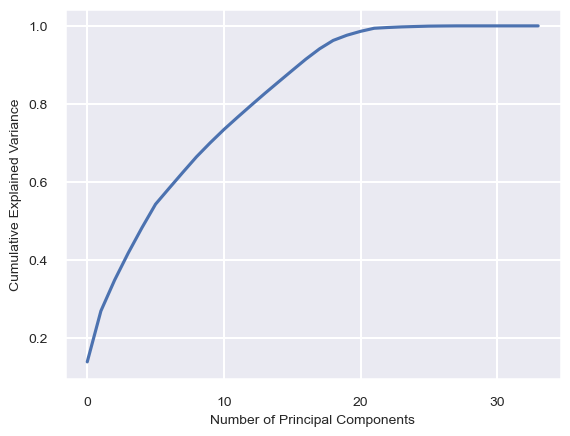

In [425]:
# Plotting the PCA to ge better understanding of the components 

%matplotlib inline

plt.plot(np.cumsum(var_ratios))
plt.xlabel('Number of Principal Components', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Cumulative Explained Variance', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [426]:
# Extracting the components that retain the most variance
# The treshold set is of to maintain 95% of variance

n_components = np.argmax(np.cumsum(var_ratios) >= 0.95) + 1
n_components

19

In [427]:
# Transforming the data

X_pca = pca.transform(X_scaled)[:, :n_components]
X_pca

array([[-2.06131590e+00, -8.87976973e-01, -8.72534969e-01, ...,
        -1.37045693e+00,  9.08162072e-01,  1.03844440e-01],
       [ 5.41707281e+00,  2.07786583e+00, -1.18716831e-03, ...,
         1.28790940e+00,  8.72156390e-01, -1.08121343e-01],
       [-3.92265628e+00,  1.41186611e+00,  1.51403538e+00, ...,
        -9.91213492e-01,  1.05199937e+00, -3.64506204e-01],
       ...,
       [-1.90547391e+00,  5.85756762e-01, -8.28857453e-01, ...,
         5.91679801e-02, -5.86487728e-01,  1.24986720e+00],
       [ 3.88249641e+00,  1.82680229e+00, -1.08601892e+00, ...,
         1.22096645e+00, -5.89621909e-01, -3.50360719e-01],
       [-2.23553092e+00,  1.67535931e+00, -4.89047969e-01, ...,
        -2.37852668e-01, -1.84931308e-01, -5.89521136e-01]])

Now that we have reduced even more our features to be used (40 to 19), we will move forward to our modelling task.

### Modelling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Random Forest
- Naive Bayes
- SVM
- XGBoost
- The ensemble of your own choice

For each model, we are going to use the 'train_flights_subset_version_0' and 'X_pca' to compare both of their functionality and results.

In [479]:
# Importing libraries

import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Linear Regression Model and Ridge Regression Model

In [482]:
# Modelling the Linear Regression Model first
# Just to remember, y = train_flights_subset['arr_delay']

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=100)

lr = LinearRegression()
lr.fit(X_pca_train, y_train)
y_pred_lm = lr.predict(X_pca_test)

# Calculating some evaluation metrics 

mae = mean_absolute_error(y_test, y_pred_lm)
mse = mean_squared_error(y_test, y_pred_lm)
r2 = r2_score(y_test, y_pred_lm)
rmse = np.sqrt(mse)

print('The Linear Regression Model Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse))
print('R2_score is {:.2f}.'.format(r2))

The Linear Regression Model Results are:
Mean Absolute Error (MAE) is 18.87.
Mean Squared Error (MSE) is 3218.57.
Root Mean Squared Error (RMSE) is 56.73.
R2_score is 0.16.


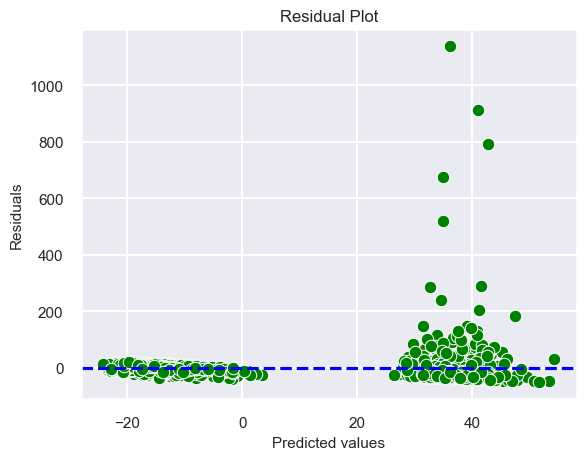

In [500]:
# Plotting the residuals against the predicted values

residuals = y_test - y_pred_lm

sns.set_theme(style='darkgrid', context='talk')
sns.scatterplot(x=y_pred_lm, y=residuals, color='green')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted values', fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.yticks(fontsize=11)
plt.title('Residual Plot', fontsize=12)
plt.show()

This model gave us a very low Mean Absolue Error (MAE) of 18.87. This means that, on average, the model's predictions are off by around 18.87 minutes from the actual arrival delay times. This might seem a large error, but at the same time this result is going to depend of the context we are evaluating our problem. In second place, we got a Mean Squared Error (MSE) of 3218.57. This means that, on average, the squared difference between the model's predictions and the actual arrival delay times is very large. As this metric is very sensitive and influenced by outliers, we would need to investigate whether the model is underestimating or overestimating arrival delays at another moment. In third place, we got a very low R-Adjusted Square of 0.16. This means that around 16% of the variance in the target variable (arrival delay times) is explained by the model. This is a relatively low R2 score, indicating that the model is not able to capture a significant portion of the variability in the data. Finally, in regards to the Root Mean Squared Error (RMSE) of 56.73, as this indicates a medium/high result, we should consider another models to see if we can find better performance as the MSE provides an estimate of the standard deviation of the residuals (prediction errors). 

Let's try now other models to see if they offer a better optimization and prediction to our flight delays.

In [509]:
# Checking the best alpha parameter value with Ridge Cross Validation
# After we are modelling with Ridge Regression

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5, 6.0])
ridge.fit(X_pca_train, y_train)
y_pred_ridge_cv = ridge.predict(X_pca_test)

# Calculating some evaluation metrics

mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
rmse_ridge_cv = np.sqrt(mse_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)

print('The Ridge Regression Model Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_ridge_cv))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_ridge_cv))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_ridge_cv))
print('R2_score is {:.2f}.'.format(r2_ridge_cv))
print("Best alpha:", ridge.alpha_)

The Ridge Regression Model Results are:
Mean Absolute Error (MAE) is 18.87.
Mean Squared Error (MSE) is 3218.56.
Root Mean Squared Error (RMSE) is 56.73.
R2_score is 0.16.
Best alpha: 6.0


In [510]:
# Modelling with Ridge Regression using an alpha value of 0.1

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=6.0) # alpha is a parameter to prevent overfitting
ridge.fit(X_pca_train, y_train)
y_pred_ridge = ridge.predict(X_pca_test)

# Calculating some evaluation metrics

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('The Ridge Regression Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_ridge))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_ridge))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_ridge))
print('R-squared is {:.2f}.'.format(r2_ridge))

The Ridge Regression Results are:
Mean Absolute Error (MAE) is 18.87.
Mean Squared Error (MSE) is 3218.56.
Root Mean Squared Error (RMSE) is 56.73.
R-squared is 0.16.


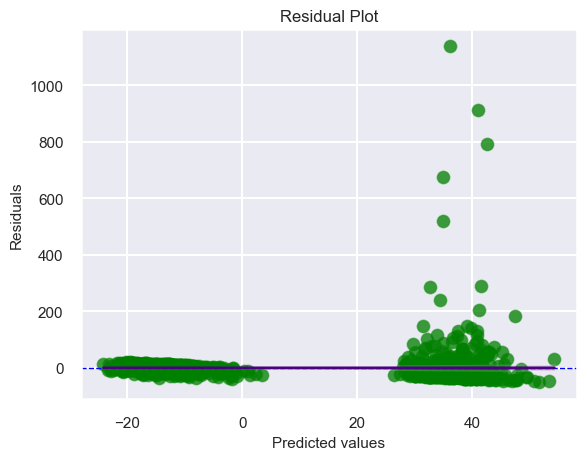

In [525]:
# Plotting the Ridge Regression Model

sns.set_theme(style='darkgrid', context='talk')
sns.scatterplot(x=y_pred_ridge, y=residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='blue', linestyle='--', linewidth=1)
sns.regplot(x=y_pred_ridge, y=residuals, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'indigo', 'linewidth': 2})
plt.xlabel('Predicted values', fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.yticks(fontsize=11)
plt.title('Residual Plot', fontsize=12)
plt.show()

Again, with this model from Ridge Regression, we found the results very similar to our Linear Regression Model. So we are going to save this model to the disk before moving forward to check other models.

In [438]:
# Saving this trained model to disk using pickle

with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge, f)

In [439]:
# Loading the trained model from disk using pickle

with open('ridge_model.pkl', 'rb') as f:
    ridge_model = pickle.load(f)

### Decision Tree Regressor and Random Forest Regressor Models

In [440]:
# Modeling with the Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=100)
dt.fit(X_pca_train, y_train)
y_pred_dt = dt.predict(X_pca_test)

# Calculating some evaluation metrics 

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print('The Decision Tree Regressor Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_dt))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_dt))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_dt))
print('R-squared is {:.2f}.'.format(r2_dt))

The Decision Tree Regressor Results are:
Mean Absolute Error (MAE) is 26.48.
Mean Squared Error (MSE) is 7120.65.
Root Mean Squared Error (RMSE) is 84.38.
R-squared is -0.86.


Based on the metrics of the decision tree, it looks like the decision tree regressor is performing even worse the linear regression model in terms of MSE and MAE. The MSE and RMSE values are higher for the decision tree regressor, which means that the model's predictions are more spread out from the actual values and the linear model is still offering a better performance than this one.

In [450]:
# Modelling with a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=100)
rf.fit(X_pca_train, y_train)
y_pred_rf = rf.predict(X_pca_test)

# Calculating some evaluation metrics 

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print('The Random Forest Regressor Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_dt))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_dt))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_dt))
print('R-squared (R2) is {:.2f}.'.format(r2_dt))

The Random Forest Regressor Results are:
Mean Absolute Error (MAE) is 26.48.
Mean Squared Error (MSE) is 7120.65.
Root Mean Squared Error (RMSE) is 84.38.
R-squared (R2) is -0.86.


Based on the metrics of the Random Forest Regressor, we got the same results of the decision tree which makes sense as the random forest is an aggregation of a group of decision trees.

### Support Vector Machines (SVMs)

In [468]:
# Modelling with SVM with a linear kernel

from sklearn.svm import SVR

svm = SVR(kernel='linear')
svm.fit(X_pca_train, y_train)
y_pred_linear = svm.predict(X_pca_test)

# Calculating some evaluation metrics

mae_svm = mean_absolute_error(y_test, y_pred_linear)
mse_svm = mean_squared_error(y_test, y_pred_linear)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_linear)

print('The Support Vector Machines Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_svm))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_svm))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_svm))
print('R-squared (R2) is {:.2f}.'.format(r2_svm))

The Support Vector Machines Results are:
Mean Absolute Error (MAE) is 15.93.
Mean Squared Error (MSE) is 3404.39.
Root Mean Squared Error (RMSE) is 58.35.
R-squared (R2) is 0.11.


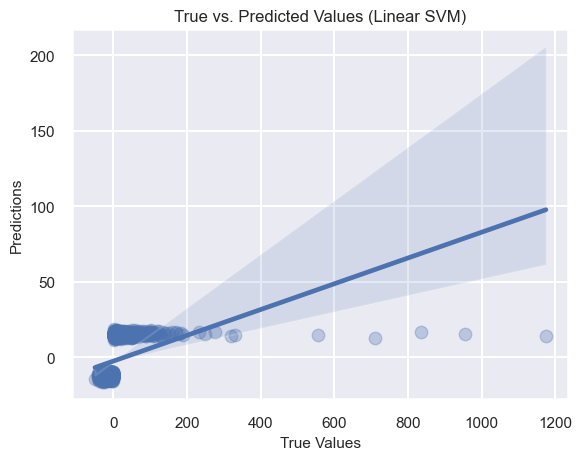

In [471]:
# Creating a scatter plot of predicted values versus true values

sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'alpha':0.3})
plt.xlabel('True Values', fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel('Predictions', fontsize=11)
plt.yticks(fontsize=11)
plt.title('True vs. Predicted Values (Linear SVM)', fontsize=12)
plt.show()

We can see that the SVM is also not offering a got fit for our predictions. It looks like its performance is similar to the one offered by the Ridge Regression Model, but with a higher MSE, and a lower R-squared value (value of 0.11). However, in an overwall, the values looked very similar to the linear model and the MAE is a little bit lower than the linear model (it is 15.93) so its predictions are off only 15.93 minutes from the actual arrival delay times.

One possible reason for the poor performance could be the choice of kernel. So let's try experimenting with different kernels, such as the polynomial to see if it improves the performance of the SVM model.

In [465]:
# Modelling with SVM with a polynomial kernel

svm_poly = SVR(kernel='poly', degree=3, C=1.0, gamma='scale')
svm_poly.fit(X_pca_train, y_train)
y_pred_poly = svm_poly.predict(X_pca_test)

# Calculating some  evaluation metrics

mae_svm_poly = mean_absolute_error(y_test, y_pred)
mse_svm_poly = mean_squared_error(y_test, y_pred)
rmse_svm_poly = np.sqrt(mse)
r2_svm_poly = r2_score(y_test, y_pred)

print('The Support Vector Machines Results are:')
print('Mean Absolute Error (MAE) is', round(mae_svm_poly, 2))
print('Mean Squared Error (MSE) is', round(mse_svm_poly, 2))
print('Root Mean Squared Error (RMSE) is', round(rmse_svm_poly, 2))
print('R-squared (R2) is', round(r2_svm_poly, 2))

The Support Vector Machines Results are:
Mean Absolute Error (MAE) is 16.52
Mean Squared Error (MSE) is 3544.7
Root Mean Squared Error (RMSE) is 56.73
R-squared (R2) is 0.07


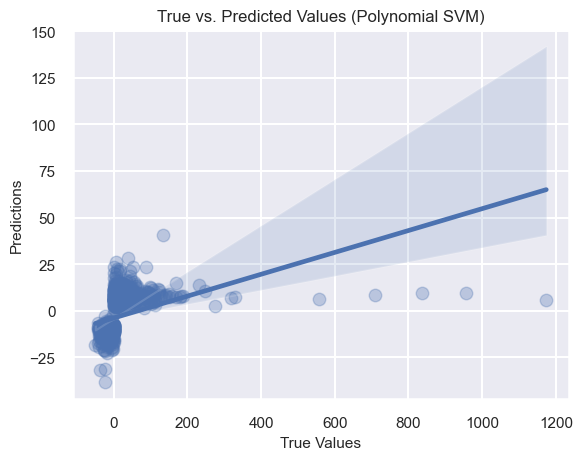

In [466]:
# Creating a scatter plot of predicted values versus true values

sns.regplot(x=y_test, y=y_pred_poly, scatter_kws={'alpha':0.3})
plt.xlabel('True Values', fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel('Predictions', fontsize=11)
plt.yticks(fontsize=11)
plt.title('True vs. Predicted Values (Polynomial SVM)', fontsize=12)
plt.show()

With those results, the SVM with the polynomial kernel did not offer a better performance to our model. 

### XGBOOST

In [529]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.4 MB/s eta 0:00:0000:010:01


In [535]:
# Modelling with XGBoost Regressor Model
import xgboost as xgb

# Creating a DMatrix for XGBoost

dtrain = xgb.DMatrix(X_pca_train, label=y_train)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'seed': 42
}

# Trainning XGBoost model and predicting on test data

num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)
dtest = xgb.DMatrix(X_pca_test)
y_pred_xgb = xgb_model.predict(dtest)

# Calculating evaluation metrics

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print('The XGBoost Model Results are:')
print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_xgb))
print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_xgb))
print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_xgb))
print('R2_score is {:.2f}.'.format(r2_xgb))

The XGBoost Model Results are:
Mean Absolute Error (MAE) is 19.70.
Mean Squared Error (MSE) is 3474.77.
Root Mean Squared Error (RMSE) is 58.95.
R2_score is 0.09.


From these metrics, we can conclude that the Linear Regression Model or the Ridge Regression Model provides the best fit for our predictions for now, but in the future it would be needed new insights and approachs to our feature engineering as this step can help us to improve the performance of our models.

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

In [447]:
# # We are first going to test our set with the Ridge Regression Model to evaluate its performance

# # Loading the saved model from disk
# with open('ridge_model.pkl', 'rb') as f:
#     ridge_model = pickle.load(f)

# # Using the loaded model to predict on the test data
# y_pred = ridge_model.predict(X_pca_test)

# # Evaluating the model's performance on the test set
# mae_ridge_test_set = mean_absolute_error(y_test, y_pred)
# mse_ridge_test_set = mean_squared_error(y_test, y_pred)
# rmse_ridge_test_set = np.sqrt(mse)
# r2_ridge_test_set = r2_score(y_test, y_pred)

# print('Mean Absolute Error (MAE) is {:.2f}.'.format(mae_ridge_test_set))
# print('Mean Squared Error (MSE) is {:.2f}.'.format(mse_ridge_test_set))
# print('Root Mean Squared Error (RMSE) is {:.2f}.'.format(rmse_ridge_test_set))
# print('R-squared is {:.2f}.'.format(r2_ridge_test_set))

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.